In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
from datetime import datetime, date
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager

import geopandas
import branca.colormap as cm
from branca.element import Template, MacroElement
import folium
from folium import plugins

In [2]:
# mac os
font_path = '/Library/Fonts/simhei.ttf'
fontP = font_manager.FontProperties(fname=font_path)
fontP.set_size(14)
fontP_12 = font_manager.FontProperties(fname=font_path)
fontP_12.set_size(12)

## Import datasets

In [3]:
tot_empl_province_df = pd.read_csv('datasets/按行业分城镇单位就业人员(万人)/城镇单位就业人员.csv',
                                   header=3, encoding='gb2312')
tot_empl_province_df = tot_empl_province_df[:31]
tot_empl_province_df = tot_empl_province_df.fillna(0)

In [4]:
tot_salary_province_df = pd.read_csv('datasets/按行业分城镇单位就业人员平均工资(元)/城镇单位就业人员平均工资.csv',
                                   header=3, encoding='gb2312')
tot_salary_province_df = tot_salary_province_df[:31]
tot_salary_province_df = tot_salary_province_df.fillna(0)

In [5]:
tot_chomageNb_province_df = pd.read_csv('datasets/城镇登记失业人数(万人).csv',
                                   header=3, encoding='gb2312')
tot_chomageNb_province_df = tot_chomageNb_province_df[:31]
tot_chomageNb_province_df = tot_chomageNb_province_df.fillna(0)

In [6]:
tot_chomagePct_province_df = pd.read_csv('datasets/城镇登记失业率(%).csv',
                                         header=3, encoding='gb2312')
tot_chomagePct_province_df = tot_chomagePct_province_df[:31]
tot_chomagePct_province_df = tot_chomagePct_province_df.fillna(0)

In [7]:
emplNb_province_df = pd.read_csv('datasets/empl_nb_final_per_province.csv')
salary_province_df = pd.read_csv('datasets/salary_final_per_province.csv')

## Visu tools

In [8]:
def ten_thousands(x, pos):
    return '%1.0f' % (x * 1e-4)

def ten_thousands_1dec(x, pos):
    return '%1.1f' % (x * 1e-4)


formatter_10thousands = FuncFormatter(ten_thousands)
formatter_10thousands_1dec = FuncFormatter(ten_thousands_1dec)

## Employee amount

In [9]:
tot_empl_province_df = tot_empl_province_df.sort_values('2019年', ascending=False).reset_index(drop=True)

tot_empl_prov_top10_df = tot_empl_province_df.head(10).set_index('地区').T.iloc[::-1].reset_index()
tot_empl_prov_top10_df['index'] = tot_empl_prov_top10_df['index'].apply(lambda x: x.split('年')[0])
tot_empl_prov_top10_df = tot_empl_prov_top10_df.rename(columns = {'index':'year'})

/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jingwen/github/python-playground/_venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


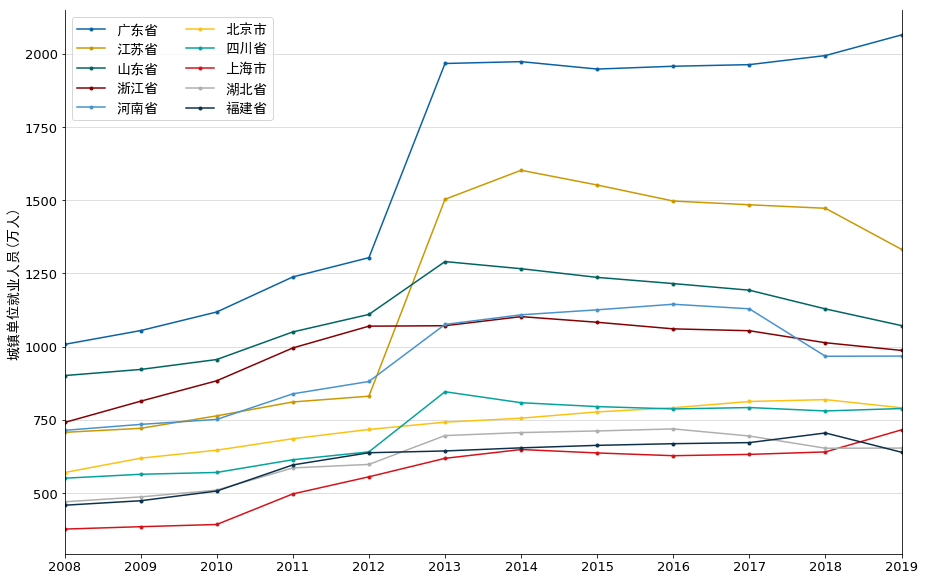

In [10]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

line_gd, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['广东省'][7:-1],
                      color='#0A62A5',
                      linewidth=1.5,
                      marker='.'
                     )
line_js, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['江苏省'][7:-1],
                      color='#CC9801',
                      linewidth=1.5,
                      marker='.'
                     )
line_sd, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['山东省'][7:-1],
                      color='#006460',
                      linewidth=1.5,
                      marker='.'
                     )
line_zj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['浙江省'][7:-1],
                      color='#850003',
                      linewidth=1.5,
                      marker='.'
                     )
line_hn, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['河南省'][7:-1],
                      color='#4893cd',
                      linewidth=1.5,
                      marker='.'
                     )
line_bj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['北京市'][7:-1],
                      color='#fcc115',
                      linewidth=1.5,
                      marker='.'
                     )
line_sc, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['四川省'][7:-1],
                      color='#05a39d',
                      linewidth=1.5,
                      marker='.'
                     )
line_sh, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['上海市'][7:-1],
                      color='#d61218',
                      linewidth=1.5,
                      marker='.'
                     )
line_hb, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['湖北省'][7:-1],
                      color='#aeafae',
                      linewidth=1.5,
                      marker='.'
                     )
line_fj, = axarr.plot(tot_empl_prov_top10_df['year'][7:-1],
                      tot_empl_prov_top10_df['福建省'][7:-1],
                      color='#0e314b',
                      linewidth=1.5,
                      marker='.'
                     )

axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 11)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员(万人)', size=13, fontproperties=fontP)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(handles=(line_gd, line_js, line_sd, line_zj, line_hn, 
                      line_bj, line_sc, line_sh, line_hb, line_fj),
             labels=('广东省', '江苏省', '山东省', '浙江省', '河南省',
                     '北京市', '四川省', '上海市', '湖北省', '福建省'),
             ncol=2,
             loc=2, prop=fontP)


截止到2019年，就业人员数最多的十个省/直辖市为广东省、江苏省、山东省、浙江省、河南省、北京市、四川省、上海市、湖北省和福建省。其中，广东省、北京市和上海市的就业人数自2018年以来持续上涨，尤其是广东省，一直位居榜首。华南城市研究会会长、暨南大学教授胡刚分析，近年来珠三角产业转型升级加快，高端制造业、信息经济等新兴产业快速发展，吸引了大量就业人口。同时珠三角地区近年来放开放宽落户限制，也吸引了很多人落户。此外，江苏省重视高校毕业生的就业，有针对性地提供就业见习、职业指导、技能培训、就业援助等帮扶；同时深化东西部扶贫协作和对口支援，大力发展家庭服务业，促进扶贫对象就业增收、创业致富。此外，统筹做好农村劳动力转移就业、农民工返乡创业、退役军人就业和就业困难人员的就业帮扶。

关于北京市就业人口，2019年就业质量报告显示，清华北大本科毕业生留京率都不到2成，其中北京大学（校本部）为16.07%，清华大学为18.20%。这已经是清北毕业生留京率连续多年下跌了。2013年，北大本科生留京率曾高达71.79%，清华本科生留京率为30.7%。以清北为代表的名校生的就业去向，代表了当下大学生的就业倾向。反观南方的两座一线城市，广州和深圳对大学生态度更为“友好”。在2020年深圳人才引进政策下，全日制本科且未满45周岁以下直接核准入户，全日制大专且未满35周岁以下直接核准入户。2020年底，广州出台宽松的落户政策，一方面，“双一流”建设高校全日制本科及以上学历的青年人才，在引进单位参加社会保险即可入户，另一方面，个别区域大专也可以落户。当年同样控制人口的上海，落户政策也有了松动。继对清北两校毕业生抛出橄榄枝后，2020年上海对本地的上海交大、复旦、同济、华东师大4所985高校的毕业生也友善招手。与上广深相比，大学生在北京落户依旧很难。2017年北京在引进毕业生的工作中强调，要按照城市总体规划，严控北京禁限产业引进毕业生。

## Employee salary

In [11]:
tot_salary_province_19_df = tot_salary_province_df.sort_values('2019年', ascending=False).reset_index(drop=True)

tot_salary_prov_top10_df = tot_salary_province_19_df.head(10).set_index('地区').T.iloc[::-1].reset_index()
tot_salary_prov_top10_df['index'] = tot_salary_prov_top10_df['index'].apply(lambda x: x.split('年')[0])
tot_salary_prov_top10_df = tot_salary_prov_top10_df.rename(columns = {'index':'year'})

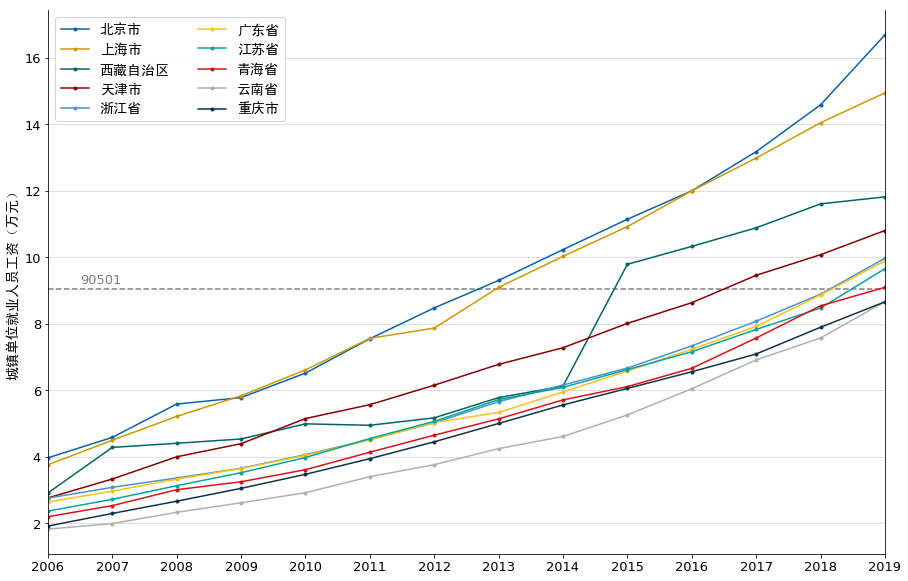

In [12]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

line_bj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['北京市'][5:-1],
                      color='#0A62A5',
                      linewidth=1.5,
                      marker='.'
                     )
line_sh, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['上海市'][5:-1],
                      color='#CC9801',
                      linewidth=1.5,
                      marker='.'
                     )
line_xz, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['西藏自治区'][5:-1],
                      color='#006460',
                      linewidth=1.5,
                      marker='.'
                     )
line_tj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['天津市'][5:-1],
                      color='#850003',
                      linewidth=1.5,
                      marker='.'
                     )
line_zj, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['浙江省'][5:-1],
                      color='#4893cd',
                      linewidth=1.5,
                      marker='.'
                     )
line_gd, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['广东省'][5:-1],
                      color='#fcc115',
                      linewidth=1.5,
                      marker='.'
                     )
line_js, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['江苏省'][5:-1],
                      color='#05a39d',
                      linewidth=1.5,
                      marker='.'
                     )
line_qh, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['青海省'][5:-1],
                      color='#d61218',
                      linewidth=1.5,
                      marker='.'
                     )
line_yn, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['云南省'][5:-1],
                      color='#aeafae',
                      linewidth=1.5,
                      marker='.'
                     )
line_cq, = axarr.plot(tot_salary_prov_top10_df['year'][5:-1],
                      tot_salary_prov_top10_df['重庆市'][5:-1],
                      color='#0e314b',
                      linewidth=1.5,
                      marker='.'
                     )
axarr.hlines(y=90501, xmin=0, xmax=13, linestyles='--', color='grey')
axarr.text(x=0.5, y=92000, s='90501', fontsize=13, color='grey')

axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 13)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员工资（万元）', size=13, fontproperties=fontP)
axarr.yaxis.set_major_formatter(formatter_10thousands)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(handles=(line_bj, line_sh, line_xz, line_tj, line_zj, 
                      line_gd, line_js, line_qh, line_yn, line_cq),
             labels=('北京市', '上海市', '西藏自治区', '天津市', '浙江省',
                     '广东省', '江苏省', '青海省', '云南省', '重庆市'),
             ncol=2,
             loc=2, prop=fontP)




在大陆31个省/自治区/直辖市中，北京上海的平均工资一直居高不下。城镇非私营单位方面，全国仅有北京、上海、西藏自治区、天津、浙江、广东、江苏等7省市的年均工资超过90501元的平均线，即月均工资超过7541.75元。其中，北京不仅是全国平均工资最高的地区，而且也是目前唯一一个私营单位、非私营单位年均工资增幅双双加快的地区，领先优势非常突出。北京统计局数据显示，2019年全市城镇非私营单位年均工资166803元，名义增速为14.4%，较上年加快3.7个百分点；私营单位年均工资为85262元，名义增长10.9%，较上年加快2.2个百分点。

## Employee number and salary per domain for some provinces in 2019

In [13]:
def visu_emplNb_salary_per_domain(province_name, ax02_xmax):
    salary_dom_province_df = salary_province_df[
        salary_province_df['地区'] == province_name].sort_values('2019年').reset_index(drop=True)

    domain_province_19_df = salary_dom_province_df.merge(
        emplNb_province_df[emplNb_province_df['地区'] == province_name][['地区', '行业', '2019年']],
        on=['地区', '行业'], suffixes=('_salary', '_population'))

    
    fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
    width = 0.5
    
    barh1 = axarr.barh(np.arange(len(domain_province_19_df)),
                       domain_province_19_df['2019年_salary'],
                       color='#fcc115', height=width) # 4893cd

    axarr.tick_params(labelsize=13)
    axarr.xaxis.set_label_position('top')
    axarr.set_xlabel('%s平均工资（万元）' % province_name, size=13, labelpad=15, fontproperties=fontP)
    axarr.set_yticks(domain_province_19_df.index)
    axarr.set_yticklabels(domain_province_19_df['行业'], fontproperties=fontP)
    axarr.set_ylim(-0.5, 14.5)
    axarr.grid(which='major', axis='x', alpha=0.5)
    axarr.xaxis.set_major_formatter(formatter_10thousands)

    ax_02 = axarr.twiny()
    ax_02.hlines(y=np.arange(len(domain_province_19_df)),
                 xmin=0, xmax=domain_province_19_df['2019年_population'],
                 color='#4893cd')
    scatter1 = ax_02.scatter(x=domain_province_19_df['2019年_population'],
                             y=np.arange(len(domain_province_19_df)),
                             s=40,
                             marker='o',
                             color='#4893cd')
    ax_02.tick_params(labelsize=13)
    ax_02.xaxis.set_label_position('bottom')
    ax_02.set_xlim(0, ax02_xmax)
    ax_02.set_xlabel('%s就业人员（万人）' % province_name, size=13, fontproperties=fontP)

    ax_02.legend(handles=(barh1, scatter1),
                 labels=('就业人员平均工资（万元）', '就业人员（万人）'),
                 loc=4, prop=fontP_12)
    axarr.xaxis.tick_top()
    ax_02.xaxis.tick_bottom()



### Beijing

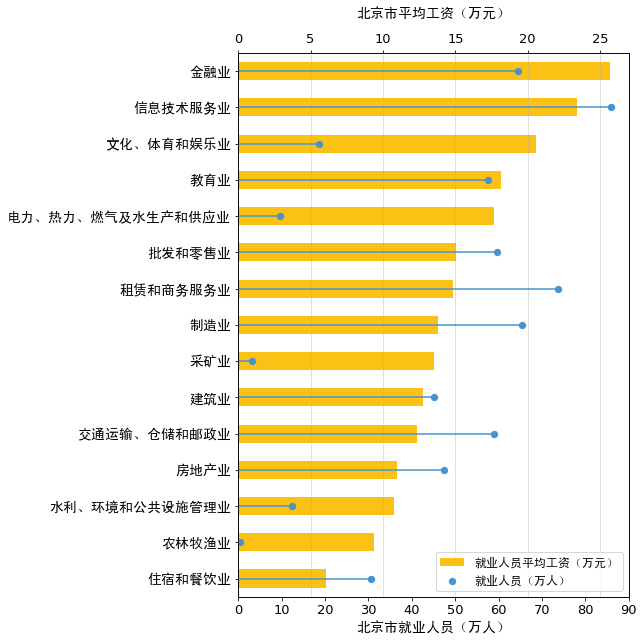

In [14]:
visu_emplNb_salary_per_domain(province_name='北京市', ax02_xmax=90)

为什么北京的平均工资能长期雄踞全国榜首？这与北京经济结构特点、从业人员分布有一定关系。北京不仅是56家世界五百强的总部所在地，也是高薪人才的聚集地。2019年北京有1163.9万从业人员，其中近19%的从业者都聚集在金融业，信息传输、软件和信息技术服务业，卫生和社会工作，这三个年均工资超20万元的行业。

### Shanghai

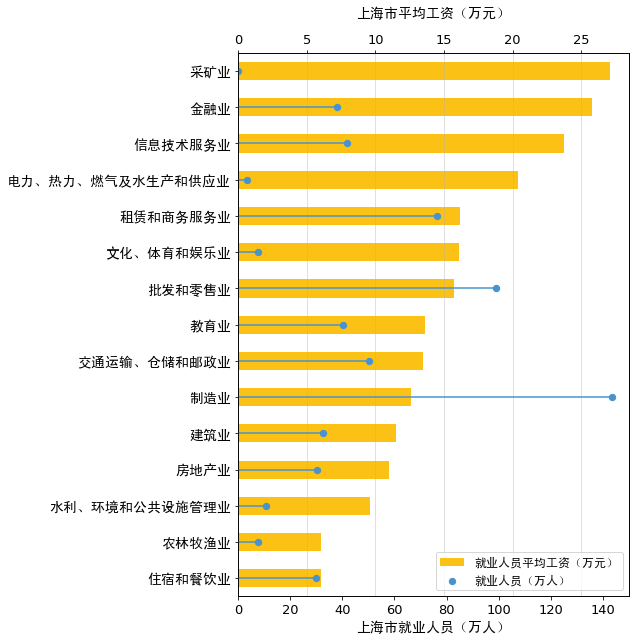

In [15]:
visu_emplNb_salary_per_domain(province_name='上海市', ax02_xmax=150)

看完这幅图的第一反应会不会是“咦？号称金融中心的上海竟然在有这么多人在工业领域工作？” 其实不奇怪，过去30年、60年、100年乃至150年，上海都是中国领先的工业城市。从2019年的数据上看，就业人数排前两位的领域为制造业及批发和零售业。

这里的制造业指的不是传统的制造业，上海的工业大项含汽车、医药、石化、钢铁等。其中，石化年产值2000亿左右，钢铁年产值2000亿左右，医药年产值1000亿左右，而这些行业在汽车行业面前，都是小巫见大巫。上海汽车行业，看上汽集团。上汽集团旗下7大品牌：大众、斯柯达、荣威、MG、别克、雪佛兰、五菱。2014年，上汽集团整车销量562万辆，销售收入6300亿元。6300亿是什么概念？2014年西安GDP5474亿，哈尔滨5332亿，石家庄5100亿，上汽集团一个企业销售收入超过西安、哈尔滨、石家庄这样的省会城市生产总值。综上所述，上海的支柱产业是汽车，支柱企业是上汽集团。

另外，高档百货、大卖场、本土连锁超市及遍地开花的便利店已将上海的零售业态挤占得密不透风。大型综合超市食品类、饮料类等商品的经营比重一直是呈现不断上升的趋势，上海市民在购买主副食品时对大超市的重视程度相当高；这些也使得批发和零售业的就业人数仅排在制造业后面。

### Xizang

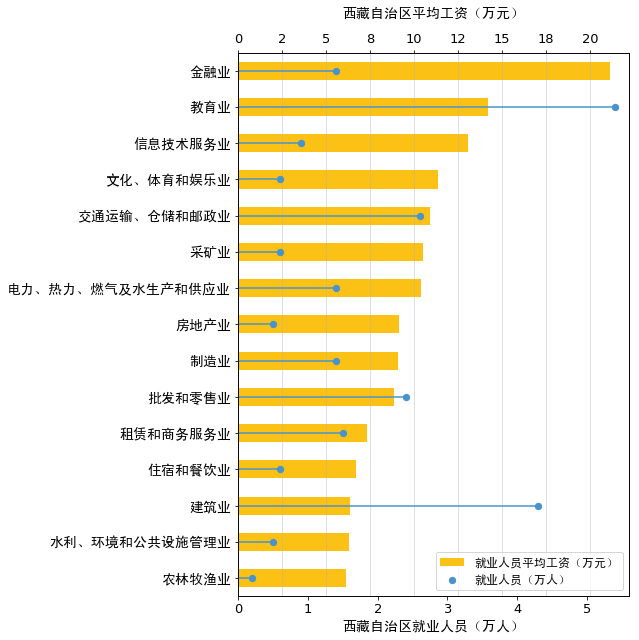

In [16]:
visu_emplNb_salary_per_domain(province_name='西藏自治区', ax02_xmax=5.6)

西藏的工资水平高，跟其地理环境和产业结构息息相关。西藏因为高海拔，地广人稀，农作物种植基础差，生态脆弱，一二产业整体比较薄弱。根据2017年西藏年报，第一、二、三产业增加值所占比重分别为9.4%、39.2%、51.4%。虽然第三产业是支柱，但不同于北上广深等发达地区，其产业布局，是建立在一、二资源和环境禀赋先天受限的基础上的，并不是产业和经济结构自然进化成熟的结果。所以，虽然工资比肩北京、上海，但从各行业平均工资的分布来看，西藏是另一番景象.

从全国来看，2019年工资水平最高的三个行业，分别是金融业、信息技术服务业（IT行业）、科学研究、技术服务和地质勘查业，平均工资分别为，121909元、120505元和112656元。再看西藏。金融业也是遥遥领先的高薪行业，平均工资达到211502，排第二的是教育业，平均工资141847元，排第三的是信息技术服务业，130430元。西藏前三的高薪行业，相差巨大，金融业平均工资遥遥领先，直逼北京和上海，远远高于国内其他省份。不像全国那样，排在前列的金融与IT行业，平均工资互相追赶，差距很小。

### Guangdong

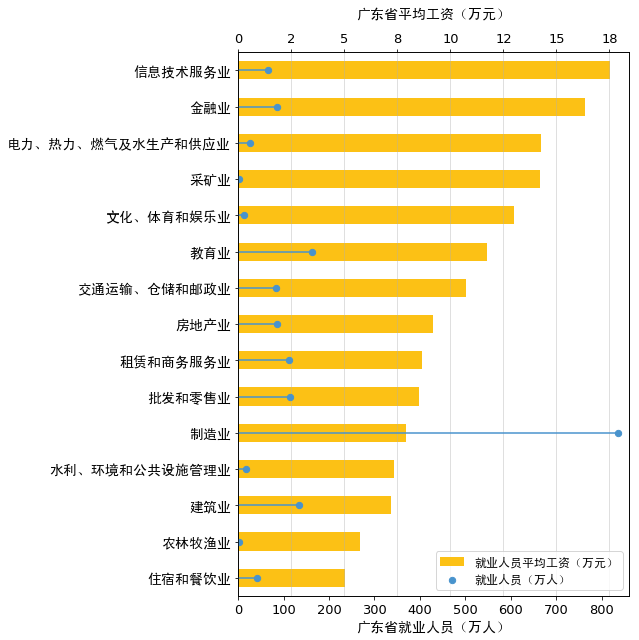

In [17]:
visu_emplNb_salary_per_domain(province_name='广东省', ax02_xmax=860)

作为制造业大省，广东制造是中国制造的闪亮名片，在全国制造业格局中占据重要地位。《2019年广东制造业500强企业研究报告》（下称《报告》）显示，华为投资控股有限公司、正威国际集团有限公司、富士康工业互联网股份有限公司位居榜单前三名，500强企业营业收入合计达4.9万亿元，比2018年增加18.64%。《报告》还显示，从区域分布来看，九成以上企业来自珠三角，城市分布变化明显；从企业竞争来看，广东制造顶尖企业在全球竞争格局中日益凸显；从发展动能来看，制造业500强研发强度、专利授权企业数量“双增长”，发展动能强劲。

### Zhejiang

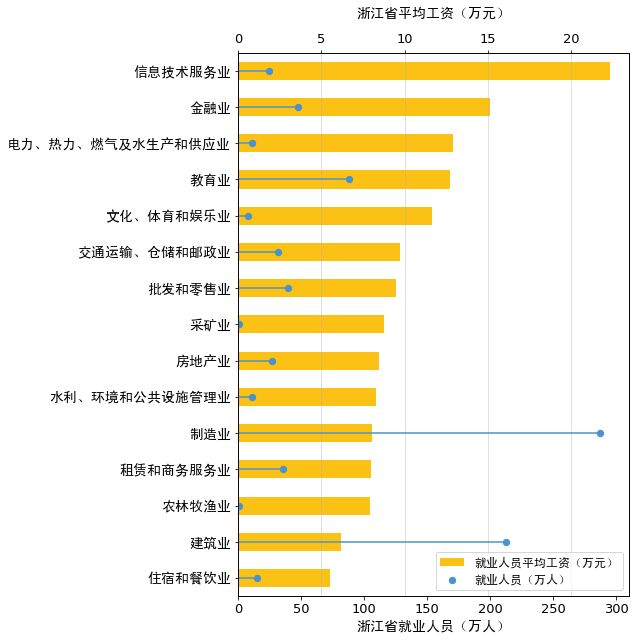

In [18]:
visu_emplNb_salary_per_domain(province_name='浙江省', ax02_xmax=310)

制造业在浙江经济中起着举足轻重的作用，是浙江国民经济增长的主要动力。制造业是浙江民营经济机制优势、集聚优势和营销优势的最重要载体与发挥者。
此外，浙江省作为经济大省，建筑业也是其传统产业之一。近年来，浙江省建筑业取得了长足的进步：产业规模不断扩张，劳动生产率、人均利润和技术装备率持续增长，工程质量优良品率保持相对稳定。浙江建筑业的产值、利税和规模已居全国领先水平，建筑业的发展为浙江乃至全国经济社会的发展和人民生活水平的提高做出了重要贡献。

## Employee number per domain

In [19]:
emplNb_domain_df = emplNb_province_df.groupby(['行业'])[
    '2008年', '2009年', '2010年', '2011年', '2012年', '2013年',
    '2014年', '2015年', '2016年', '2017年', '2018年', '2019年'].sum().T.reset_index()
emplNb_domain_df['index'] = emplNb_domain_df['index'].apply(lambda x: x.split('年')[0])
emplNb_domain_df = emplNb_domain_df.rename(columns = {'index':'year'})

<ipython-input-19-24979e59fc70>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emplNb_domain_df = emplNb_province_df.groupby(['行业'])[


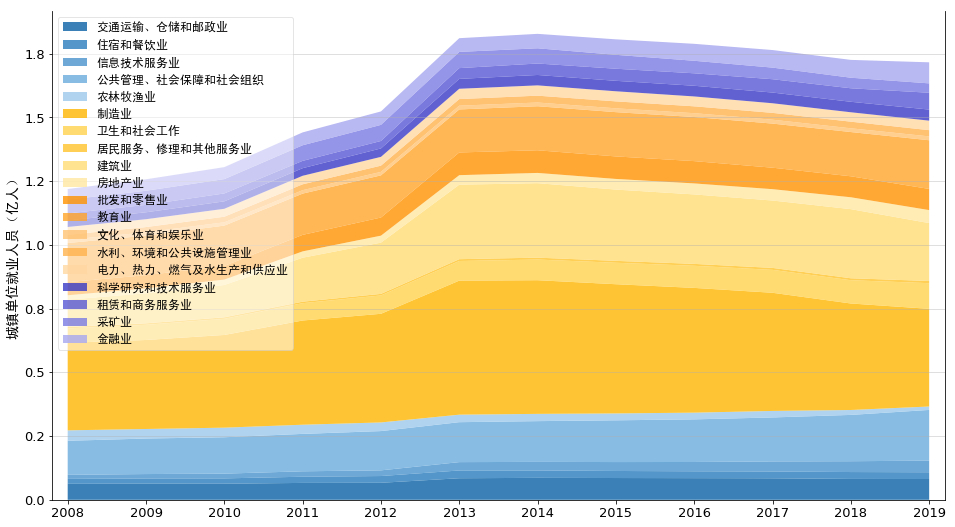

In [20]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))

axarr.stackplot(emplNb_domain_df.year,
                [emplNb_domain_df['交通运输、仓储和邮政业'],
                 emplNb_domain_df['住宿和餐饮业'],
                 emplNb_domain_df['信息技术服务业'],
                 emplNb_domain_df['公共管理、社会保障和社会组织'],
                 emplNb_domain_df['农林牧渔业'],
                 emplNb_domain_df['制造业'],
                 emplNb_domain_df['卫生和社会工作'],
                 emplNb_domain_df['居民服务、修理和其他服务业'],
                 emplNb_domain_df['建筑业'],
                 emplNb_domain_df['房地产业'],
                 emplNb_domain_df['批发和零售业'],
                 emplNb_domain_df['教育业'],
                 emplNb_domain_df['文化、体育和娱乐业'],
                 emplNb_domain_df['水利、环境和公共设施管理业'],
                 emplNb_domain_df['电力、热力、燃气及水生产和供应业'],
                 emplNb_domain_df['科学研究和技术服务业'],
                 emplNb_domain_df['租赁和商务服务业'],
                 emplNb_domain_df['采矿业'],
                 emplNb_domain_df['金融业']
                ],
                labels=['交通运输、仓储和邮政业',
                        '住宿和餐饮业',
                        '信息技术服务业',
                        '公共管理、社会保障和社会组织',
                        '农林牧渔业',
                        '制造业',
                        '卫生和社会工作',
                        '居民服务、修理和其他服务业',
                        '建筑业',
                        '房地产业',
                        '批发和零售业',
                        '教育业',
                        '文化、体育和娱乐业',
                        '水利、环境和公共设施管理业',
                        '电力、热力、燃气及水生产和供应业',
                        '科学研究和技术服务业',
                        '租赁和商务服务业',
                        '采矿业',
                        '金融业'
                       ],
                colors = ['#0A62A5', '#297CBC', '#4893CD', '#6CACDD', '#9DCAED',
                          '#FFB600', '#FFD34E', '#FFC52A', '#FFDC74', '#FFE8A2',
                          '#FF9200', '#FFA42A', '#FFC374', '#FFB34E', '#FFD7A2',
                          '#3A3AC7', '#5757D5', '#7979E3', '#A6A6F0'
                         ],
                alpha=0.8)

axarr.tick_params(labelsize=13)
axarr.set_xlim(-0.2, 11.2)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位就业人员（亿人）', size=13, fontproperties=fontP)
axarr.yaxis.set_major_formatter(formatter_10thousands_1dec)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(ncol=1, framealpha=0.5,
             loc=2, prop=fontP_12)

自2008年以来，在大陆31个省/自治区/直辖市中，城镇单位就业人口有了显著的增长，尤其在2012-2013年期间整体增长幅度最为明显，2013年以后就业人口趋于稳定。在19个就业领域中，IT业、公共管理、社会保障和社会组织、卫生和社会工作领域、房地产业、批发和零售业、租赁和商务服务业和金融业的就业人口都有了显著增长；反之，农业和采矿业的就业人口不增反降；其他领域的就业人口基本保持平衡或有轻微增长。

这一现象表现出了现在职业结构变动出现了新的情况，即农业劳动力转移的势头大为减弱，靠农村劳动力转移提高劳动生产率已经难以为继。这也从一个侧面反映了我国低成本劳动时代的结束和人口红利的消减。与此同时，工业劳动力向服务业的转移也发展迅速。根据中国社会状况综合调查的数据推算，从2008年到2019年，有数千万工业劳动者转向服务业。

## Employee salary per domain

In [21]:
salary_domain_df = salary_province_df.groupby(['行业'])[
    '2006年', '2007年', '2008年', '2009年', '2010年', '2011年', '2012年', '2013年',
    '2014年', '2015年', '2016年', '2017年', '2018年', '2019年'].mean().sort_values(
    '2019年').T.reset_index()
salary_domain_df['index'] = salary_domain_df['index'].apply(lambda x: x.split('年')[0])
salary_domain_df = salary_domain_df.rename(columns = {'index':'year'})

<ipython-input-21-d1c2b4bce35d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_domain_df = salary_province_df.groupby(['行业'])[


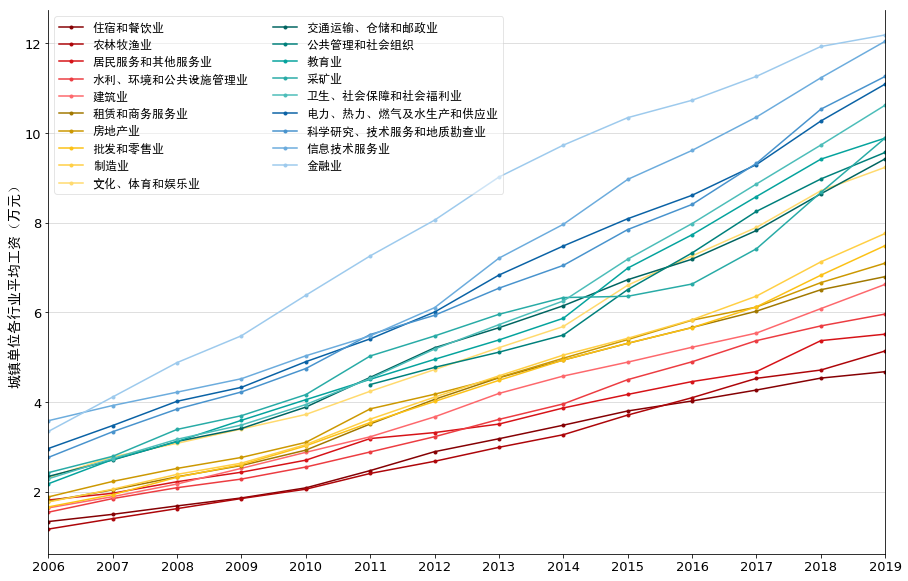

In [22]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
width = 5

color_list = ['#850003', '#AD0509', '#D61217', '#EC3C41', '#FD686C',
              '#A17800', '#CC9801', '#FCC115', '#FFCF44', '#FFDA6E',
              '#006460', '#00807B', '#05A39D', '#28ABA6', '#4CBDB9',
              '#0A62A5', '#4893CD', '#6CACDD', '#9DCAED'
             ]

nbcol = salary_domain_df.shape[1]
for i in range(1, nbcol):
    axarr.plot(salary_domain_df['year'],
               salary_domain_df[salary_domain_df.columns[i]],
               color=color_list[i-1],
               linewidth=1.5,
               marker='.'
              )

axarr.tick_params(labelsize=13)
axarr.set_xlim(0, 13)
axarr.spines['top'].set_visible(False)
axarr.set_ylabel('城镇单位各行业平均工资（万元）', size=13, fontproperties=fontP)
axarr.yaxis.set_major_formatter(formatter_10thousands)

axarr.grid(which='major', axis='y', alpha=0.5)
axarr.legend(ncol=2,
             framealpha=0.5,
             loc=2, prop=fontP_12)


自2008年以来，在大陆31个省/自治区/直辖市中，城镇单位平均工资也有了显著的增长。其中共有5个行业年平均收入超过10万元，除了金融业、信息技术服务业和科学研究、技术服务和地质勘查业，还包括电力、热力、燃气及水生产和供应业及卫生、社会保障和社会福利业。

信息技术广泛渗透，也为一批就业人员带来不错的收入。一方面，网上零售快速发展。2019年全国实物商品网上零售额比上年增长19.5%，相应地，城镇非私营单位中批发和零售业就业人员年平均工资增长11.3%。另一方面，互联网应用不断拓展。城镇非私营单位中，信息传输、软件和信息技术服务业中的互联网和相关服务业就业人员年平均工资增长9%

从图中我们不难发现，城镇单位中房地产行业的平均工资并没有很高。截至2019年，房地产业的平均工资低于文化、体育和娱乐业以及教育业，国家统计局人口和就业统计司副司长孟灿文指出，伴随居民收入水平和消费能力持续提升，人民对美好生活需求不断释放，文化、体育、健康养老等社会事业持续发展，相关行业就业人员工资水平继续提高。

此外，“随着供给侧结构性改革不断深化，‘三去一降一补’成果进一步巩固，带动相关行业平均工资保持较快增长态势。”国家统计局人口和就业统计司副司长孟灿文说。这在采矿和制造领域表现明显。2019年，采矿业就业人员在城镇非私营单位年平均工资增长10.5%。制造业就业人员在城镇非私营单位年平均工资增长11.1%。


## Employee number and salary per province for some domains in 2019

In [23]:
def visu_emplNb_salary_per_province(domain_name, ax02_xmax):    
    salary_dom_province_df = salary_province_df[
        salary_province_df['行业'] == domain_name].sort_values('2019年').reset_index(drop=True)

    domain_province_19_df = salary_dom_province_df.merge(
        emplNb_province_df[emplNb_province_df['行业'] == domain_name][['地区', '行业', '2019年']],
        on=['地区', '行业'], suffixes=('_salary', '_population'))

    
    fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10, 13))
    width = 0.5

    barh1 = axarr.barh(np.arange(len(domain_province_19_df)),
                       domain_province_19_df['2019年_salary'],
                       color='#fcc115')

    axarr.tick_params(labelsize=13)
    axarr.xaxis.set_label_position('top')
    axarr.set_xlabel('%s平均工资（万元）' % domain_name, size=13, labelpad=17, fontproperties=fontP)
    axarr.set_yticks(domain_province_19_df.index)
    axarr.set_yticklabels(domain_province_19_df['地区'], fontproperties=fontP)
    axarr.set_ylim(-1, 31)
    axarr.grid(which='major', axis='x', alpha=0.5)
    axarr.xaxis.set_major_formatter(formatter_10thousands)

    ax_02 = axarr.twiny()
    ax_02.hlines(y=np.arange(len(domain_province_19_df)),
                 xmin=0, xmax=domain_province_19_df['2019年_population'],
                 color='#4893cd')
    scatter1 = ax_02.scatter(x=domain_province_19_df['2019年_population'],
                             y=np.arange(len(domain_province_19_df)),
                             s=40,
                             marker='o',
                             color='#4893cd')
    ax_02.tick_params(labelsize=13)
    ax_02.xaxis.set_label_position('bottom')
    ax_02.set_xlim(0, ax02_xmax)
    ax_02.set_xlabel('%s就业人员（万人）' % domain_name, size=13, fontproperties=fontP)

    ax_02.legend(handles=(barh1, scatter1),
                 fontsize=13,
                 labels=('就业人员平均工资（万元）', '就业人员（万人）'),
                 loc=4, prop=fontP)

    axarr.xaxis.tick_top()
    ax_02.xaxis.tick_bottom()

### IT

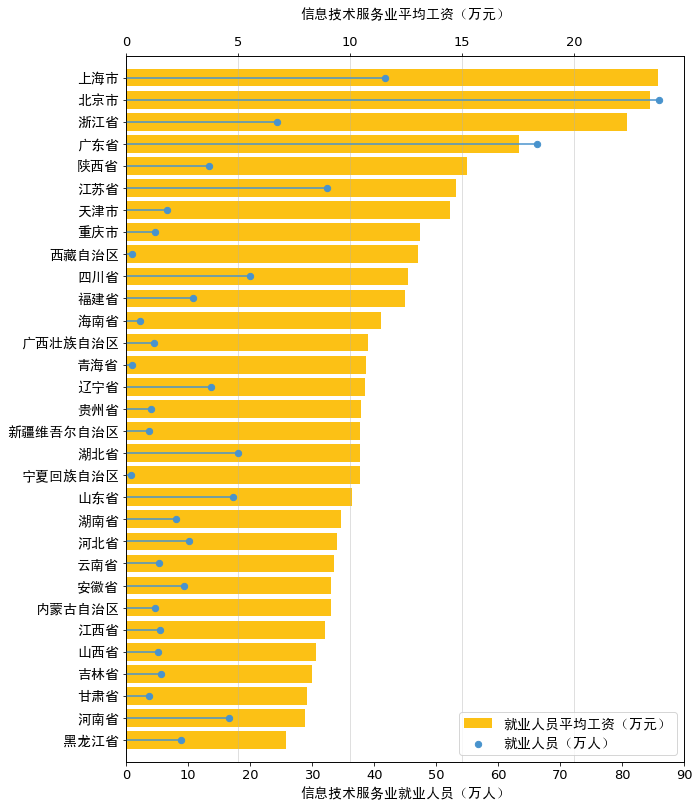

In [24]:
visu_emplNb_salary_per_province(domain_name='信息技术服务业', ax02_xmax=90)

从全国互联网行业平均工资的地域分布来看，上海市、北京市、浙江省、广东省位居前四，其中上海市、北京市、广东省的就业人数也位居前三，表明这些城市给程序员提供的机会非常充足。原因是这些城市互联网大厂较多，集中了众多的头部企业和中小型公司。此外，作为互联网行业的技术核心人员，程序员的工作门槛较高，劳动强度也大，因而相应的薪资也较高。

### Finance

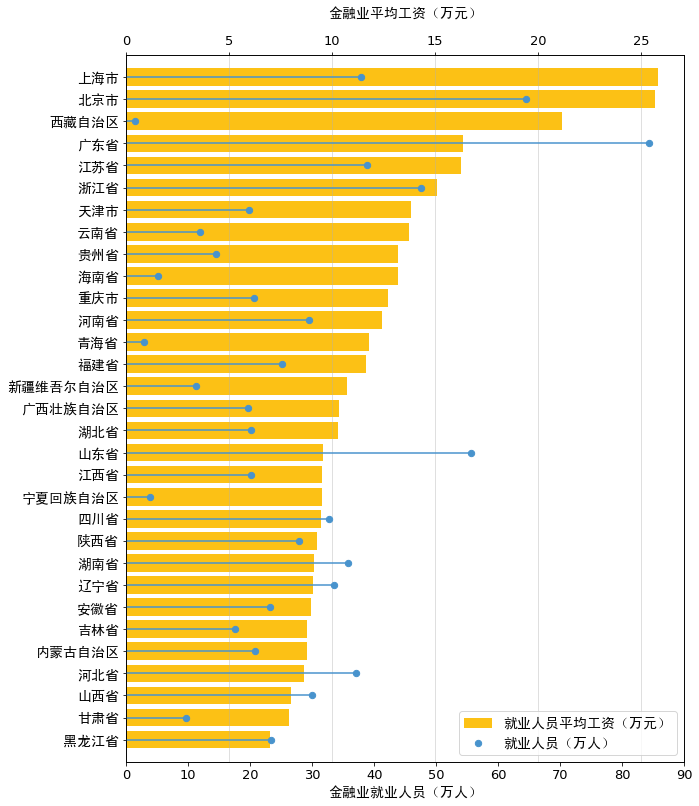

In [25]:
visu_emplNb_salary_per_province(domain_name='金融业', ax02_xmax=90)

金融行业的工资与地方经济发展水平高度相关，截至2019年，在大陆31个省/自治区/直辖市中，城镇单位金融业平均工资最多的为上海市和北京市，已高于25万。新财富公布的中国区域金融力排行榜显示，上海在宏观经济实力、金融业发展程度、融资能力、金融机构实力四个方面都优于北京，总分6.63，位列排行榜第二；北京在资本化程度、民间资本活跃度两个方面占优，总得分6.05，位列排行榜第三。虽然看上去，上海在各大榜单的排名都领先北京，不过细究起来，北京的金融体量其实更大，因为北京地区的国有资本更为集中，而上海的外资资本则更多。城镇单位金融业就业人数上，北京有64.5万人，较上海37.9万人的规模更庞大。

关于广东省城镇单位中金融业就业人口为何如此之多，据新浪财经头条分析是因为广东省除了货币金融服务和市场资本服务的就业人员以外，其余大部分都从事于保险业。

### 电力、热力、燃气及水生产和供应业

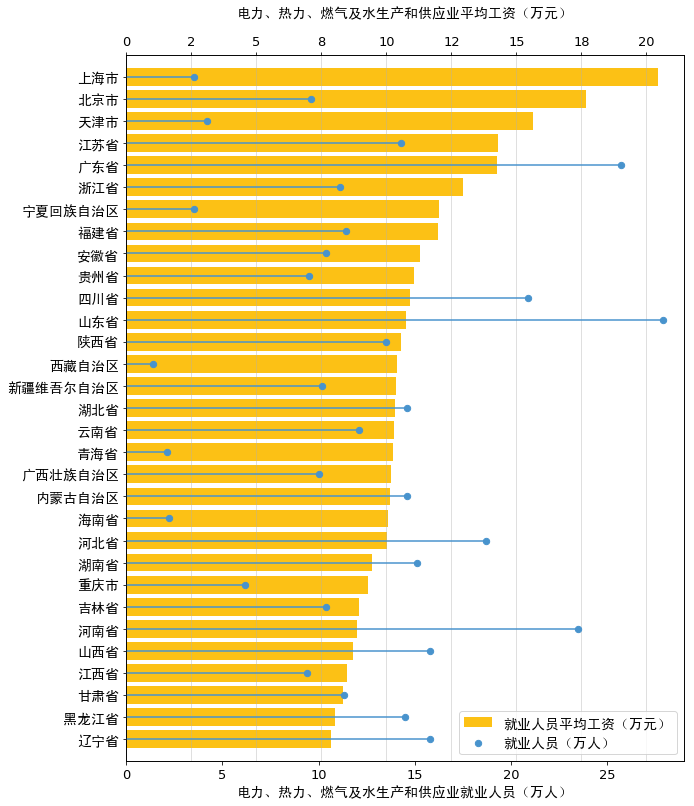

In [26]:
visu_emplNb_salary_per_province(domain_name='电力、热力、燃气及水生产和供应业', ax02_xmax=29)

2019年我国全社会用电量稳步增长，第三产业和居民用电量成为拉动用电量增长的主要因素，电力消费结构日益优化。截至2019年，在大陆31个省/自治区/直辖市中，上海市、北京市、天津市、江苏省、广东省以及浙江省的电力、热力、燃气及水生产和供应业的平均工资已超12万元。


同时，21世纪电力行业进入了网络用电的新时代，这一趋势的发展必然会带动人才市场的需求变动，市场需要更高层次的复合型专业人才，而在电气工程领域，就业市场上最受欢迎的是电气工程硕士等高学历人才的就业。大多国家电网总部，省市电力设计院等单位对电气工程的高学历人才都有一定的需求。
截至2019年，在大陆31个省/自治区/直辖市中，山东省电力、热力、燃气及水生产和供应业的就业人数最多，小编认为这其中少不了山东大学的一份力，山东大学电工程学科实力强劲，而且因为地处山东，与装备制造企业山东电工电气和国网山东供电公司的合作甚为紧密。省内其余高校大多为双非院校，但是很多学校开设电气工程学科，生源也为山东本地，所以自然成为山东省电力员工的重要来源。

广东省为什么有这么多就业人员呢？除了南方电网的总部位于广东省，粤电集团也在广东各高校吸引了不少优质人才。

### 房地产业

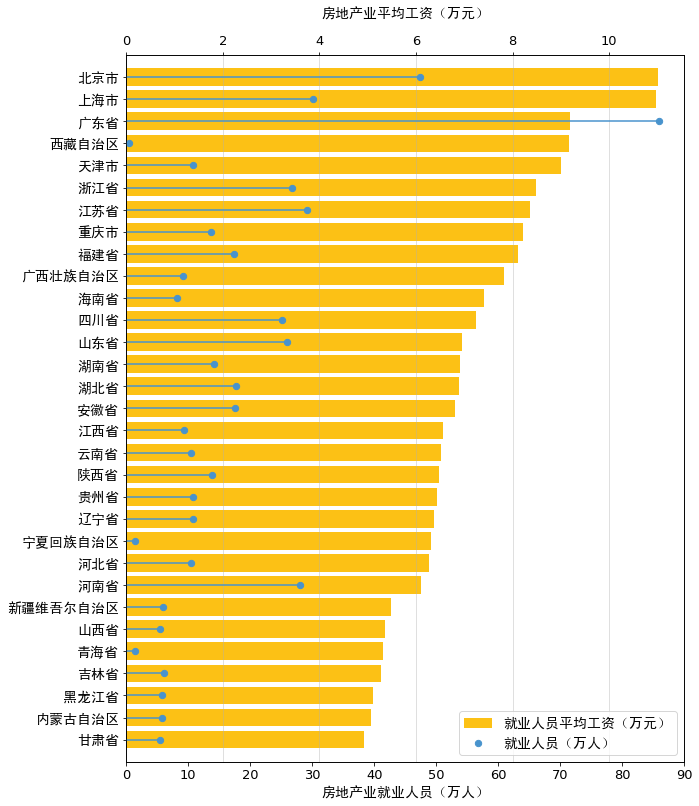

In [27]:
visu_emplNb_salary_per_province(domain_name='房地产业', ax02_xmax=90)

整体看来，截至2019年，城镇单位中房地产业的平均工资并不是遥遥领先的，且与排在工资榜首的IT业和金融业相差甚远。在大陆31个省/自治区/直辖市中，北京市、上海市、广东省的平均工资位居前三，就业人数来说广东省比其他两个城市多出一倍多数量，位居第一。其中的原因可能是国内几大房地产企业的总部都位于广东省，例如碧桂园、恒大、万科，融创中国也于2015年成立广深区域公司。

## Reference

- 林小昭，第一财经，广东流动人口超5200万，深圳十年猛增700多万人 https://www.yicai.com/news/101051457.html
- 吖海说热点，广东，凭什么成为全国最吸引人口的省份，远超江苏？https://www.sohu.com/a/466646223_120131445
- 新华日报，江苏省今年将新增城镇就业120万人 http://www.gov.cn/xinwen/2019-01/05/content_5355108.htm
- 任泽平，新浪财经，从国际经验看北京上海等超大城市人口发展趋势 http://finance.sina.com.cn/zl/china/2021-01-11/zl-iiznctkf1380680.shtml
- 诸葛找房，2019年全国平均工资版图：北京位列第一！https://news.leju.com/2020-07-08/6686423057948786003.shtml
- 西部君，西藏的平均工资，到底高到什么程度 https://zhuanlan.zhihu.com/p/37028885
- 上海的 GDP 是靠什么支撑的？https://www.zhihu.com/question/27689443
- 图灵Don，上海的 GDP 是靠什么支撑的？ https://www.zhihu.com/question/27689443/answer/66975626
- 商业数据网，2021-2024年上海零售业前景预测及投资建议报告 https://zhuanlan.zhihu.com/p/365491234
- 南方网，2019年广东制造业500强出炉 http://economy.southcn.com/e/2019-11/14/content_189512784.htm
- 2019年中国浙江制造业产业发展概况及发展趋势分析 https://www.chyxx.com/industry/202010/899667.html
- 浙江省建筑业在国民经济中的地位与发展政策研究 http://tjj.zj.gov.cn/art/2019/3/20/art_1630496_31400049.html
- 李培林、崔岩："我国2008～2019年间社会阶层结构的变化及其经济社会影响" https://www.chinathinktanks.org.cn/content/detail?id=r2xvkz91
- 人民日报海外版 2019全国城镇单位就业人员平均工资出炉 6行业年均超10万 https://finance.sina.com.cn/china/gncj/2020-05-18/doc-iirczymk2152725.shtml
- 大连千锋互联 《2019全国互联网行业程序员就业报告》看看IT行业的主力军 https://zhuanlan.zhihu.com/p/88711873
- 萝卜投资© 北京vs上海，哪里是金融人的最好归宿？ https://www.huxiu.com/article/362047.html
- 刘晓博说财经，中国金融业白日见鬼？！深圳=北京+上海？广州=1.7个上海？ https://cj.sina.com.cn/articles/view/3876353431/e70c759701900s27h
- 麦克奥迪智慧能源，2020年电气行业工资待遇如何？ https://zhuanlan.zhihu.com/p/348500934
- 瀚海，2020国网各省电力公司招聘详细数据分析（持续更新） https://zhuanlan.zhihu.com/p/127385118
- 广东国企招聘考试，这家国企也是“铁饭碗”，只招这些专业，待遇丰厚 https://zhuanlan.zhihu.com/p/42831831
- 21世纪经济报道，私营单位平均月工资3686元，房地产为何逐步沦为收入偏低行业？ https://finance.sina.com.cn/roll/2019-05-14/doc-ihvhiews1768805.shtml
- 新浪财经-自媒体综合，房地产业艰难2019：超8万家停业 有头部公司减员 https://finance.sina.com.cn/chanjing/cyxw/2019-12-11/doc-iihnzahi6785356.shtml?cref=cj
